In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 550 data with 300 features
print(x_train.shape)

(550, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    length = len(x_train)
    idx_list = list(range(length))
    val_data = np.split(np.array(idx_list), k)
    final_data = []
    for fold in range(k):
        list_train = []
        list_val = []
        for index in range(length):
            if index in val_data[fold]:
                list_val.append((x_train[index], y_train[index]))
            else:
                list_train.append((x_train[index], y_train[index]))
        final_data.append([np.array(list_train),np.array(list_val)])
    return final_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 55 # The number of data in each validation fold should equal to training data divieded by K

/tmp/ipykernel_16637/4119303063.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data.append([np.array(list_train),np.array(list_val)])


## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  4  5  6  7  8  9 10 13 14 15 16 17 18 19], Validation index: [ 2  3 11 12]
Split: 2, Training index: [ 0  1  2  3  6  7  8  9 10 11 12 13 14 15 16 17], Validation index: [ 4  5 18 19]
Split: 3, Training index: [ 0  2  3  4  5  7  8  9 10 11 12 14 16 17 18 19], Validation index: [ 1  6 13 15]
Split: 4, Training index: [ 0  1  2  3  4  5  6 10 11 12 13 14 15 17 18 19], Validation index: [ 7  8  9 16]
Split: 5, Training index: [ 1  2  3  4  5  6  7  8  9 11 12 13 15 16 18 19], Validation index: [ 0 10 14 17]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [9]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [10]:
## your code
grid_C = [10000., 1000., 100., 10., 1, 0.1, 0.01]
grid_gamma = [1000., 100., 10., 1, 0.1, 0.01, 0.001, 0.0001]
all_mean_score = np.zeros((len(grid_C), len(grid_gamma)))

for X, para_C in enumerate(grid_C):
    for Y, para_gamma in enumerate(grid_gamma):
        #print("grid: C: %s, gamma: %s" % (para_C, para_gamma))

        K = 5
        kf = KFold(n_splits=K, shuffle=True)
        score_list = []
        for i, (train_index, val_index) in enumerate(kf.split(x_train)):
            x_train_part = []
            y_train_part = []
            x_val_part = []
            y_val_part = []
            for index in range(len(x_train)):
                if index in train_index:
                    x_train_part.append(x_train[index])
                    y_train_part.append(y_train[index])
                else:
                    x_val_part.append(x_train[index])
                    y_val_part.append(y_train[index])
            
            clf = SVC(C=para_C, kernel='rbf', gamma=para_gamma).fit(x_train_part, y_train_part)
            score = clf.score(x_val_part, y_val_part)
            #print(score, end="\t")
            score_list.append(score)    
        all_mean_score[X][Y] = np.mean(score_list)

print(all_mean_score)

[[0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.68909091
  0.88       0.88727273]
 [0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.69090909
  0.88545455 0.87272727]
 [0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.68909091
  0.88545455 0.87090909]
 [0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.69090909
  0.89818182 0.71636364]
 [0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.68909091
  0.68909091 0.68909091]
 [0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.68909091
  0.68909091 0.68909091]
 [0.68909091 0.68909091 0.68909091 0.68909091 0.68909091 0.68909091
  0.68909091 0.68909091]]


In [12]:
best_score = -1
best_parameters = (-1, -1)
for X in range(len(grid_C)):
    for Y in range(len(grid_gamma)):
        if all_mean_score[X][Y] > best_score:
            best_parameters = (grid_C[X], grid_gamma[Y])
            best_score = all_mean_score[X][Y]

print(best_parameters)

(10.0, 0.001)


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

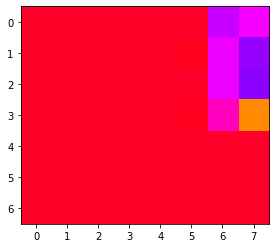

In [14]:
import matplotlib.pyplot as plt

plt.imshow(all_mean_score, cmap='gist_rainbow')
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [15]:
best_para_C, best_para_gamma = best_parameters

best_model = SVC(C=best_para_C, kernel='rbf', gamma=best_para_gamma).fit(x_train, y_train)

y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.8958333333333334
